In [1]:
import pickle
import sklearn
import pandas as pd

In [2]:
print(sklearn.__version__)

1.2.2


In [3]:
with open("..\\..\\saved_models\\baseline\\hate_speech_models_20251128_133702.pkl", "rb") as f:
    data = pickle.load(f)

vectorizer = data["vectorizer"]
model = data["cc_svm"]
thresholds = data["cc_svm_thresholds"]
labels = data["label_columns"]
features_list = vectorizer.get_feature_names_out()

def predict_text(text):
    X = pd.Series([text])
    X_vec = vectorizer.transform(X)
    
    probs = model.predict_proba(X_vec)
    pred = (probs >= thresholds).astype(int)[0]

    return dict(zip(labels, pred))

In [4]:
from svm_lr_shap import shap_kernel_instance,plot_shap_values

In [19]:
TARGET_LABEL = 'HS_Individual'
TARGET_INDEX = labels.index(TARGET_LABEL)

kalimat_tes = "jokowi presiden terbaik dunia akhirat"
print(predict_text(kalimat_tes),"\n")
base, shap, fitur = shap_kernel_instance(kalimat_tes, vectorizer, model, features_list,labels, TARGET_LABEL, num_samples=128)

{'HS_Individual': 1, 'HS_Group': 0, 'HS_Religion': 0, 'HS_Race': 0, 'HS_Physical': 0, 'HS_Gender': 0} 

Fitur aktif (6): ['terbaik', 'presiden', 'jokowi presiden', 'jokowi', 'dunia', 'akhirat']
Menjelaskan label: HS_Individual (Index 0)
Jumlah subset yang dipakai: 64
--------------------------------------------------
Kalimat: jokowi presiden terbaik dunia akhirat
Penjelasan untuk: HS_Individual
--------------------------------------------------
jokowi: 0.5363
akhirat: -0.1064
dunia: -0.0765
jokowi presiden: -0.0384
presiden: 0.0381
terbaik: -0.0264

Baseline (E[f(x)]): 0.25216036743003123
Baseline + ΣKernelSHAP: 0.5786933506500711
Prediksi Asli f(x): 0.5409679040260595
Total waktu SHAP: 9.0319 detik


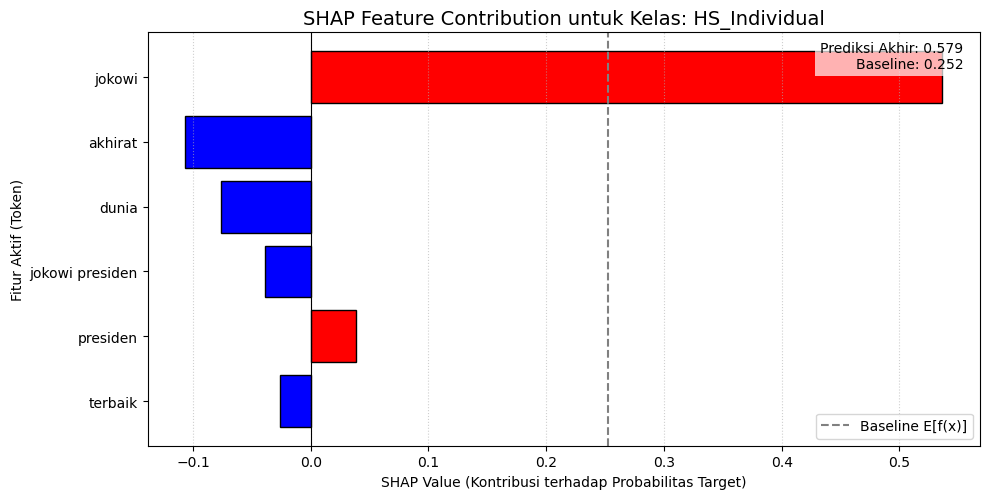

In [20]:
plot_shap_values(
    base_value=base, 
    shap_values=shap, 
    fitur_aktif=fitur, 
    sentence=kalimat_tes, 
    target_label=TARGET_LABEL, 
    top_n=8
)